In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [3]:
from helpers import *

In [4]:
dataset_seed = 4
train_test_seed = 4

In [5]:
X, y = get_dataset(n=250, seed=dataset_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=train_test_seed)

## Show the dataset with train / test split

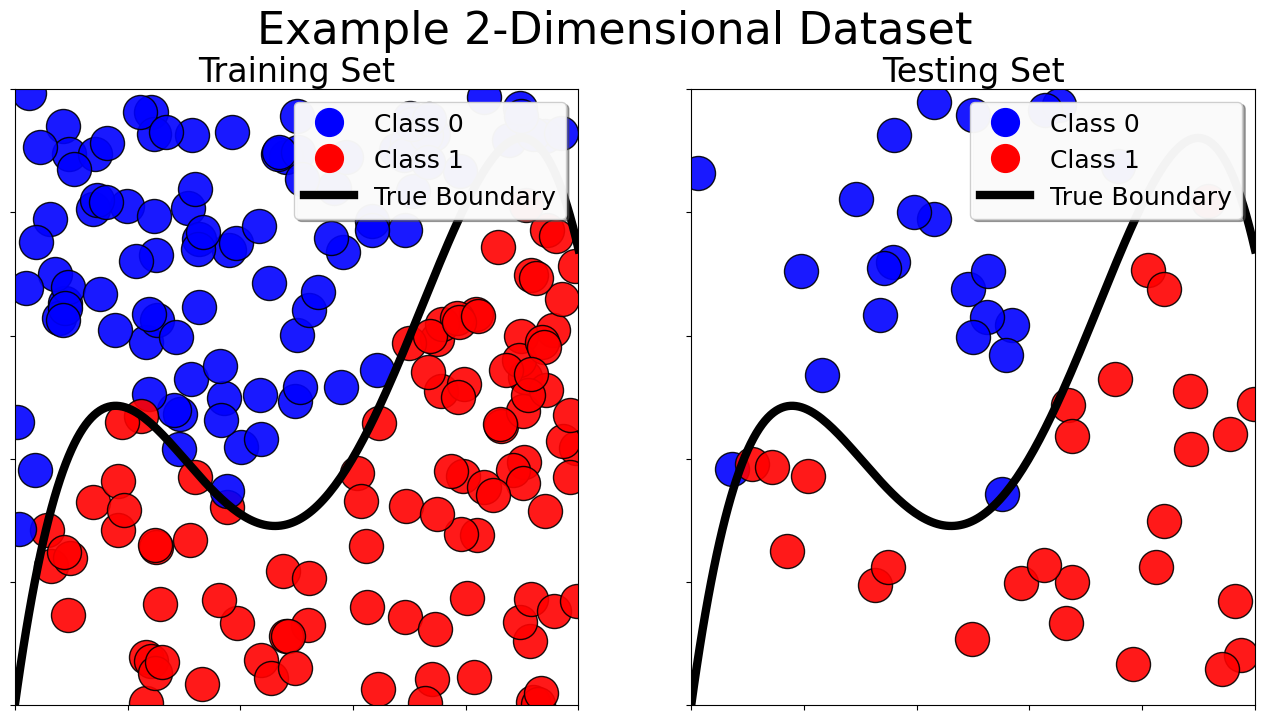

In [6]:
fig, ax = subplots(figsize=(16, 8), ncols=2, nrows=1)
scatter_pts(ax[0], X_train, y_train)
scatter_pts(ax[1], X_test, y_test)
xx = np.linspace(0, 1, 200)
yy = poly(xx)

legend_lines = [
    Line2D([], [], lw=0,
           color='blue', marker='o',
           markersize=20, label='Class 0'),
    Line2D([], [], lw=0,
           color='red', marker='o',
           markersize=20, label='Class 1'),
    Line2D([], [], color='black', lw=6),
]

ax[0].set_title('Training Set', fontsize=24)
ax[0].legend(legend_lines, ['Class 0', 'Class 1', 'True Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')
ax[0].plot(xx, yy, color='black', linewidth=6)

ax[1].set_title('Testing Set', fontsize=24)
ax[1].legend(legend_lines, ['Class 0', 'Class 1', 'True Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')
ax[1].plot(xx, yy, color='black', linewidth=6)
fig.suptitle('Example 2-Dimensional Dataset', fontsize=32)

plt.show()

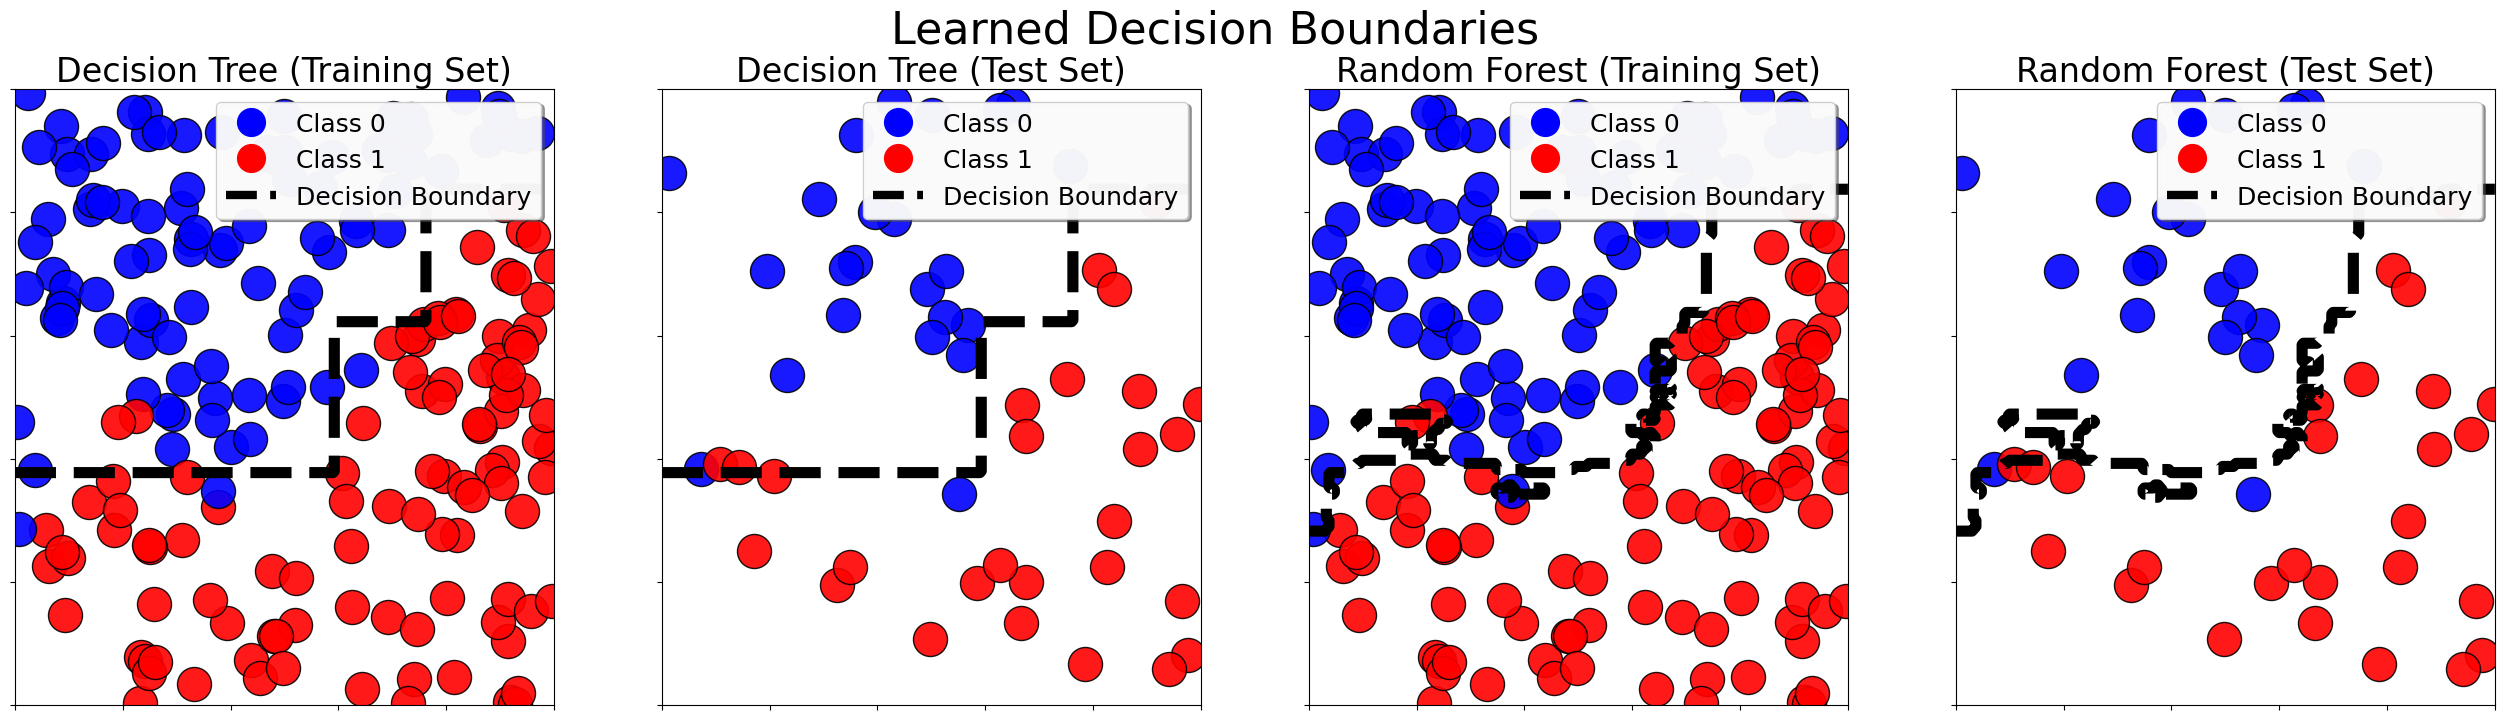

In [7]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

fig, ax = subplots(figsize=(32, 8), ncols=4, nrows=1)

scatter_pts(ax[0], X_train, y_train)
scatter_pts(ax[2], X_train, y_train)
scatter_pts(ax[1], X_test, y_test)
scatter_pts(ax[3], X_test, y_test)

contour(ax[0], dt, linestyles='--')
contour(ax[1], dt, linestyles='--')
contour(ax[2], rf, linestyles='--')
contour(ax[3], rf, linestyles='--')

legend_lines = [
    Line2D([], [], lw=0,
           color='blue', marker='o',
           markersize=20, label='Class 0'),
    Line2D([], [], lw=0,
           color='red', marker='o',
           markersize=20, label='Class 1'),
    Line2D([], [], color='black', lw=6, linestyle='--'),
]

ax[0].set_title('Decision Tree (Training Set)', fontsize=24)
ax[0].legend(legend_lines, ['Class 0', 'Class 1', 'Decision Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')

ax[1].set_title('Decision Tree (Test Set)', fontsize=24)
ax[1].legend(legend_lines, ['Class 0', 'Class 1', 'Decision Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')

ax[2].set_title('Random Forest (Training Set)', fontsize=24)
ax[2].legend(legend_lines, ['Class 0', 'Class 1', 'Decision Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')

ax[3].set_title('Random Forest (Test Set)', fontsize=24)
ax[3].legend(legend_lines, ['Class 0', 'Class 1', 'Decision Boundary'],
      fontsize=18, framealpha=0.95, shadow=True, loc='upper right')

fig.suptitle('Learned Decision Boundaries', fontsize=32)

plt.show()

### Train the grader
- Collect the patterns each base classifier struggles to classify
- Perform oversampling with SMOTE

In [8]:
from functools import partial

from src.experiment import collect_wrong_indices, get_ternary_grader_data

dt_func = partial(DecisionTreeClassifier, max_depth=3, random_state=0)
rf_func = partial(RandomForestClassifier, random_state=0)

dt_wrong = collect_wrong_indices(dt_func, X_train, y_train)
rf_wrong = collect_wrong_indices(rf_func, X_train, y_train)

In [9]:
grader_x_not_os, grader_y_not_os = get_ternary_grader_data(dt_wrong, rf_wrong, X_train, skip_oversampling=True)
np.bincount(grader_y_not_os)

array([190,   2,   8])

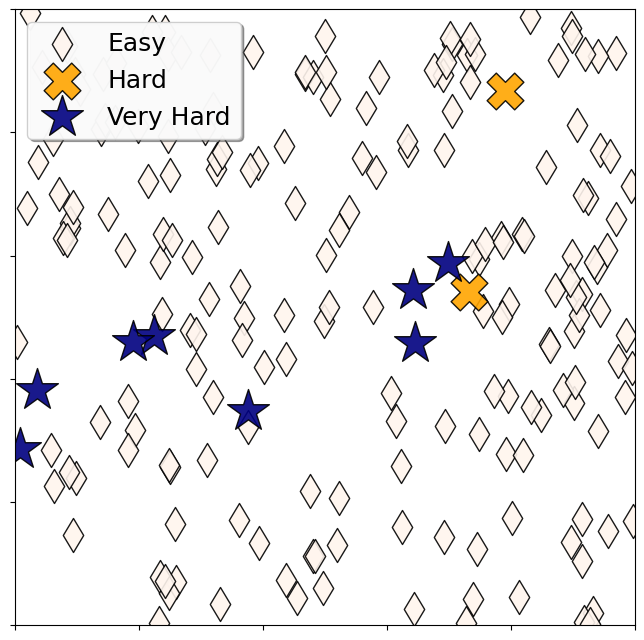

In [13]:
grader_difficulty_style = [
    {
        's': 300,
        'marker': 'd',
        'c': 'seashell',
        'alpha': 0.9,
        'edgecolor': 'black',
    },
    {
        's': 700,
        'marker': 'X',
        'c': 'orange',
        'alpha': 0.9,
        'edgecolor': 'black',
    },
    {
        's': 1000,
        'marker': '*',
        'c': 'navy',
        'alpha': 0.9,
        'edgecolor': 'black',
    },
]

fig, ax = subplots(figsize=(8, 8))
scatter_pts(ax, grader_x_not_os, grader_y_not_os, style=grader_difficulty_style, shuffle_points=False)
ax.legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)
plt.show()

In [11]:
grader_x_os, grader_y_os = get_ternary_grader_data(dt_wrong, rf_wrong, X_train, skip_oversampling=False)
np.bincount(grader_y_os)

array([190, 190, 190])

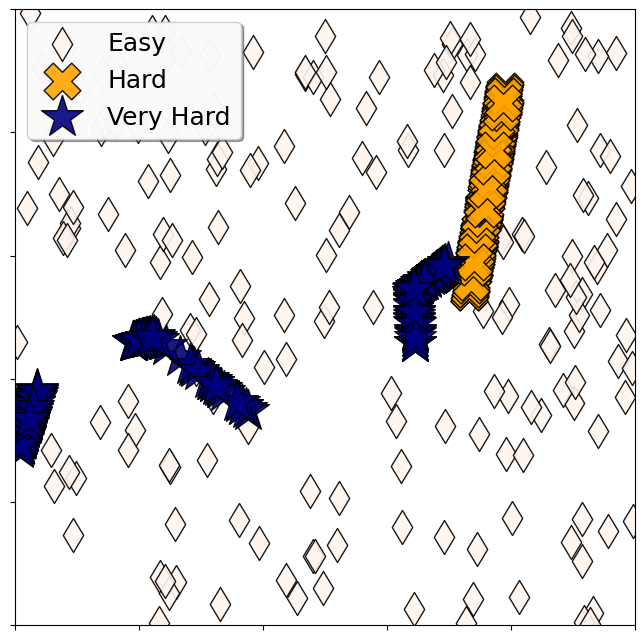

In [14]:
fig, ax = subplots(figsize=(8, 8))
scatter_pts(ax, grader_x_os, grader_y_os, style=grader_difficulty_style, shuffle_points=False)
ax.legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)
plt.show()

In [32]:
grader = DecisionTreeClassifier(max_depth=3)
grader.fit(grader_x_os, grader_y_os);

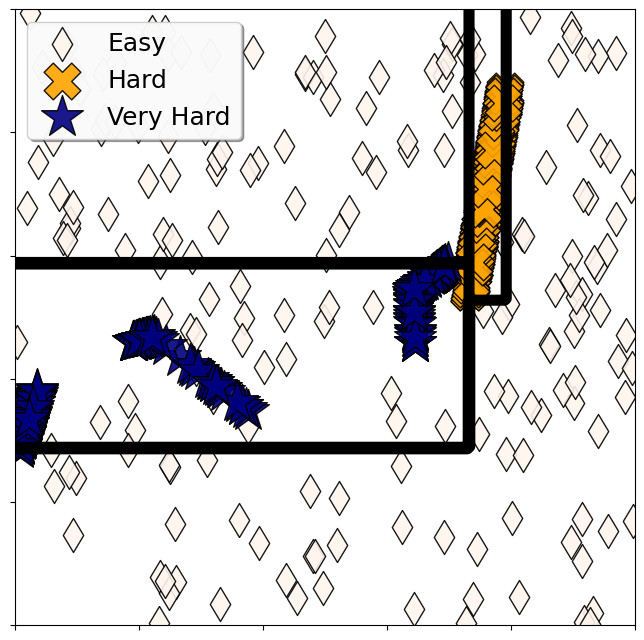

In [53]:
fig, ax = subplots(figsize=(8, 8))
res = 201
xx, yy, grid = make_grid()
ax.contour(xx, yy, grader.predict(grid).reshape((res, res)), levels=[0.5, 1.5], linestyles='-', colors=['black'], linewidths=8)
scatter_pts(ax, grader_x_os, grader_y_os, style=grader_difficulty_style, shuffle_points=False)

ax.legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)

plt.show()

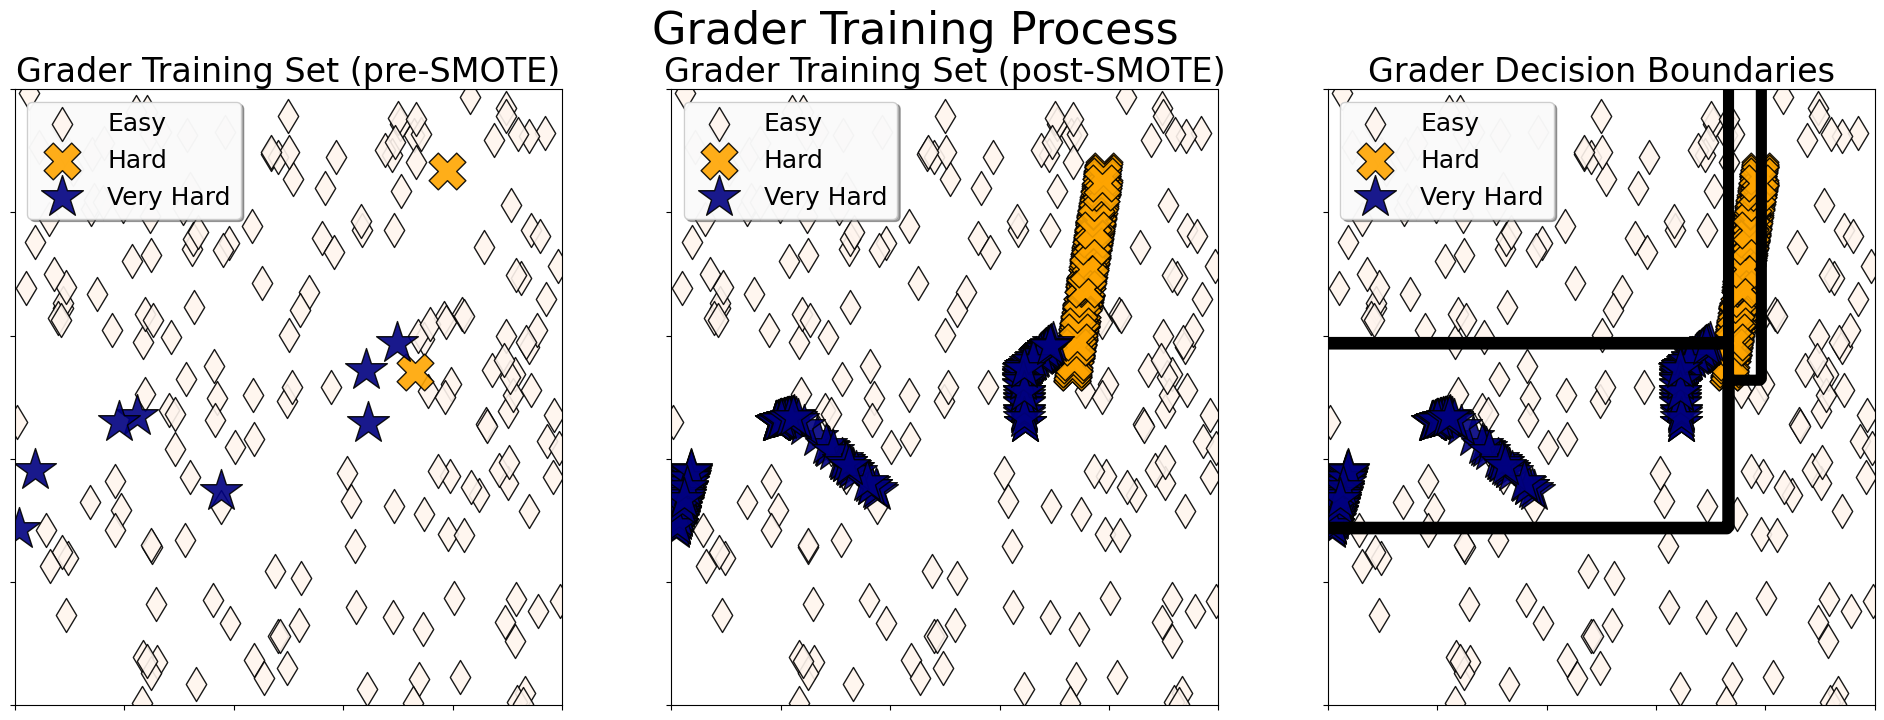

In [60]:
fig, ax = subplots(figsize=(24, 8), ncols=3)

scatter_pts(ax[0], grader_x_not_os, grader_y_not_os, style=grader_difficulty_style, shuffle_points=False)
ax[0].legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)
ax[0].set_title('Grader Training Set (pre-SMOTE)', fontsize=24)

scatter_pts(ax[1], grader_x_os, grader_y_os, style=grader_difficulty_style, shuffle_points=False)
ax[1].legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)
ax[1].set_title('Grader Training Set (post-SMOTE)', fontsize=24)

scatter_pts(ax[2], grader_x_os, grader_y_os, style=grader_difficulty_style, shuffle_points=False)
ax[2].legend(['Easy', 'Hard', 'Very Hard'],
          loc='upper left', framealpha=0.95, shadow=True, fontsize=18)
ax[2].contour(xx, yy, grader.predict(grid).reshape((res, res)), levels=[0.5, 1.5], linestyles='-', colors=['black'], linewidths=8)
ax[2].set_title('Grader Decision Boundaries', fontsize=24)


fig.suptitle('Grader Training Process', fontsize=32)
plt.show()